[jupyter notbook tricks](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)

# <span style="color:red">**Fundamentals of Network Analysis**</span>

## <span style="color:green">Street Network Analysis</span>

based on osnmx and pandana goals of the tutorial.

*  Basic concepts of network analysis.
*  routing.  
*  bearing.

based on the open data of:

*  [OpenStreetMap](https://www.openstreetmap.org/#map=17/-1.29036/36.82450)

Requirements:

*  Python Knowledge
*  [Geopandas](https://geopandas.org/en/stable/)
*  OpenStreetMap

Status

"My Way")

## <span style="color:green">Setup</span>

For this tutorial we will use **OSMnx** = (**OpenstreetMap + Networkx**).

Boeing, G. 2017. "[OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks](https://geoffboeing.com/publications/osmnx-complex-street-networks/)" *Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004* text

In [1]:
try:
    import pygeos
except ModuleNotFoundError as e:
    !pip install pygeos==0.13
    import pygeos


  Using cached pygeos-0.13-cp310-cp310-win_amd64.whl (1.4 MB)


… and now we can install OSMnx

In [2]:
try:
    import osmnx  as ox
except ModuleNotFoundError as e:
    !pip install osmnx==1.2.2
    import osmnx  as ox
if ox.__version__ != "1.2.2":
    !pip install -U osmnx==1.2.2
    import osmnx  as ox

C:\Users\Dell\anaconda3\envs\GEE_Python\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


  Using cached osmnx-1.2.2-py2.py3-none-any.whl (92 kB)
  Using cached Shapely-1.8.5.post1-cp310-cp310-win_amd64.whl (1.3 MB)
  Attempting uninstall: Shapely
    Found existing installation: shapely 2.0.1
    Uninstalling shapely-2.0.1:
      Successfully uninstalled shapely-2.0.1


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dell\\anaconda3\\envs\\GEE_Python\\Lib\\site-packages\\~hapely\\lib.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



… and all the other packages needed for this lesson

In [3]:
try:
    import mapclassify
except ModuleNotFoundError as e:
    !pip install mapclassify
    import mapclassify

if mapclassify.__version__ != "2.4.3":
  !pip install -U mapclassify==2.4.3

  Using cached mapclassify-2.4.3-py3-none-any.whl (38 kB)
  Attempting uninstall: mapclassify
    Found existing installation: mapclassify 2.5.0
    Uninstalling mapclassify-2.5.0:
      Successfully uninstalled mapclassify-2.5.0


In [5]:
# try:
#     import pyrosm
# except ModuleNotFoundError as e:
#     !pip install pyrosm==0.6.1
#     import pyrosm

In [6]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

## <span style="color:green">Let’s start with OSMnx</span>

In [7]:
import osmnx as ox
import matplotlib.pyplot as plt

### <span style="color:blue">prepare the data</span>

… we can choose the same city used on the last tutorial

[Venice in Italy](https://www.openstreetmap.org/relation/44230)

In [8]:
place_name = "Venezia, Lido, Venice, Venezia, Veneto, Italy"

.. and we can extract all the streets where it’s possible to drive

OSMnx creates an overpass query to ask the data inside the area of name of the city and collect all the [highways](https://wiki.openstreetmap.org/wiki/Key:highway) where a car can move.

Eg.
https://overpass-turbo.eu/s/1nnv

OSMnx transform the data from OpenStreetMap in graph for networkx


## <span style="color:green">**Graph Theory**</span>
text from [wikipedia]()

A graph is made up of **vertices** (*also called nodes or points*) which are connected by **edges** (*also called links or lines*)

A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetrically;



Example
undirected graph with three nodes and three edges.



Example
a directed graph with three vertices and four directed edges
(the double arrow represents an edge in each direction).

the type of graph generated by OSMnx is a MultiDiGraph: a directed graphs with self loops and parallel edges

more information [here.](https://networkx.org/documentation/stable/reference/classes/multidigraph.html)

In [9]:
G = ox.graph_from_place(place_name, network_type='all')

In [10]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

OSMnx converts the graph from latitude/longitude (WGS83) to the right UTM coordinate reference system for the area selected

In [11]:
G_proj = ox.project_graph(G)

from osmnx you can create geodataframes (gdfs) from a netxworkx Graph

In [12]:
gdfs = ox.graph_to_gdfs(G_proj)

In [13]:
type(gdfs)

tuple

#### <span style="color:magenta">**0 => nodes (**points**)**</span>
#### <span style="color:magenta">**1 => edges (**lines**)**</span>)

In [14]:
type(gdfs[0])

geopandas.geodataframe.GeoDataFrame

In [15]:
gdfs[0].geometry.type.unique()

array(['Point'], dtype=object)

In [16]:
gdfs[1].geometry.type.unique()

array(['LineString'], dtype=object)

In [17]:
gdfs[1].crs

<Projected CRS: +proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

extract only the nodes (projected)


In [18]:
nodes_proj = ox.graph_to_gdfs(G_proj, edges=False, nodes=True)

In [19]:
type(nodes_proj)

geopandas.geodataframe.GeoDataFrame

In [20]:
nodes_proj.crs

<Projected CRS: +proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 33N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

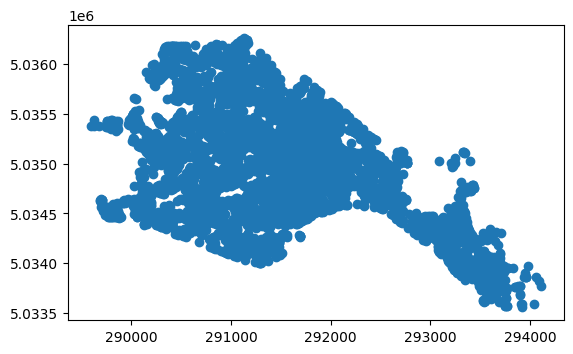

In [21]:
nodes_proj.plot()
plt.show()

In [22]:
lines_proj = ox.graph_to_gdfs(G_proj, nodes=False)

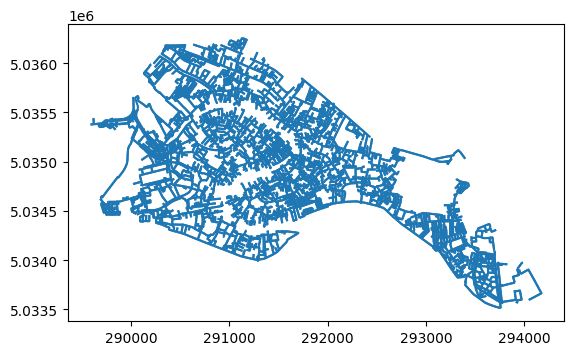

In [23]:
lines_proj.plot()
plt.show()

… and we can use it as a normal geodaframe

Eg:

what sized area does our network cover in square meters?

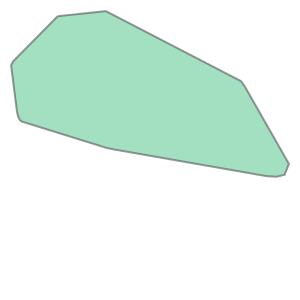

In [24]:
nodes_proj.unary_union.convex_hull

In [25]:
graph_area_m = nodes_proj.unary_union.convex_hull.area
graph_area_m

7367792.1376793785

with OSMnx we can extract some basic statistics

stats documentation: 

https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.stats

### <span style="color:green">**Glossary of the terms used by the statistics**</span>

For a complete list look the [networkx documentation](https://networkx.org/documentation/stable/)

*  density
*  
defines the density of a graph. The density is 0 for a graph without edges and 1 for a complete graph. The density o multigraphs can e  higher than 1
.*  
cent
*  r
is the set of points with eccentricity equal to radi
u* s.
betwnees centrality
is the number of possible interactions between two non-adjacent p
o*  **ints
closeness cent**rality
is the average distance of a point from all the
 *  **others
clustering coe**fficient
the measure of the degree to which points in a graph tend to cluster
 *  **together
degree **centrality
the number of lines incident u
p*  **on a point
**eccentricity
the eccentricity of a point in a graph is defined as the length of a longest shortest path starting 
a*  **t that p**oint
diameter
the maxim
u*  **m eccentricity
e**dge connectivity
is equal to the minimum number of edges that must be removed to disconnect a graph or r
e*  **nder it trivial.
**
node connectivity
is equal to the minimum number of points that must be removed to disconnect a graph or
 *  **render i**t trivial.
pagerank
computes a ranking of the nodes (points) in a graph based on the structure of the incoming links (lines). It was originally designed as an algorit
h*  **m to rank** web pages.
periphery
is the set of nodes with eccentricit
y*  ** equal** to the diameter
radius
is the minimum eccentricity.
… and we can plot the map

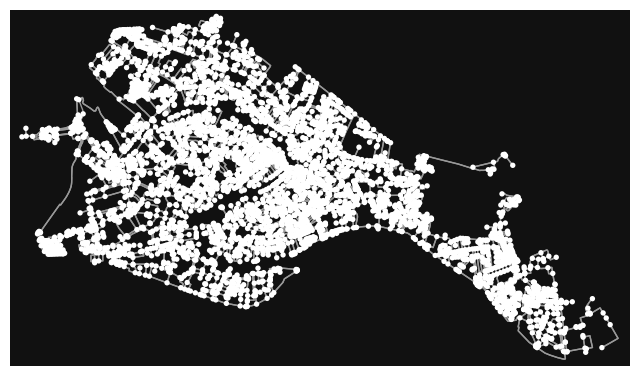

In [26]:
fig, ax = ox.plot_graph(G)
plt.show()

In [27]:
import networkx as nx

In [28]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')

## <span style="color:green">**Find the shortest path between 2 points by minimizing travel time**</span>

### <span style="color:green">calculate the travel time for each edgePermalink</span>

### <span style="color:magenta">Define Origin and Destination</span>
Example:

from the train station of Venezia Santa Lucia to the Rialto Bridge

**train station**
[
Venezia Santa Luc](https://www.openstreetmap.org/node/6063641885)ia

lat: 45.4410753
lon: 12.3210**322

Rialto** B[ridge

Ponte ](https://www.openstreetmap.org/way/199258374)di Rialto

lat: 45.43805
lon: 12.33593

Example:

from the train station of Venezia Santa Lucia to the Rialto Bridge

In [ ]:
OSMnx transform the data from OpenStreetMap in [graph](https://networkx.org/documentation/stable/reference/introduction.html#graphs) for [networkx](https://networkx.org/)

## <span style="color:green">**Graph Theory**</span>

Text from [ wikipedi](https://en.wikipedia.org/wiki/Graph_theory)a

A graph is made up of vertices (also called nodes or points) which are connected by edges (also called links or lines)

A distinction is made between undirected graphs, where edges link two vertices symmetrically, and directed graphs, where edges link two vertices asymmetric

Example

undirected graph with three nodes and three edges.

Example
a directed graph with three vertices and four directed edges
(the double arrow represents an edge in each direction).

the type of graph generated by OSMnx is a MultiDiGraph: a directed graphs with self loops and parallel edges

more inform[atio](https://networkx.org/documentation/stable/reference/classes/multidigraph.html)

n hereally;